# Tool vs Algorithm - A case study

> I stand tall on the shoulders of giants. I read biographies of people I respect, and I trust tools built by people much more into the problem-set to handle any dirty-work. This started when I programmed a TI-89 to do the quadratic equation over learning the rote a squared + b squared notation (ironically, writing the program foced me to understand the equation). Recently I came across an algorithm question posed as such:

#### Request
> You have a very large array of cordinates and want the top K closest. Write a fast method to do this.

#### Response
> My go-to was to import pandas and use it's built in `.sort()`. Done. Right? What's the BigO of this implementation? Probably close to nlog(n), but I couldn't be sure and didn't have access to the docs (it's [quicksort](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html), timsort is python default). Some direction later I attempted to write a heap-sorted sub array implementation (denoted as `iterate_saver` below). Conclusion at the bottom.

In [1]:
import numpy as np
import pandas as pd 
import heapq as hq
import matplotlib.pyplot as plt

In [2]:
##
# Use this method to generate N points on an X, Y coordinate plane.
def generate_array(n):
    return (np.random.rand(n, 2) * 100).astype(int)

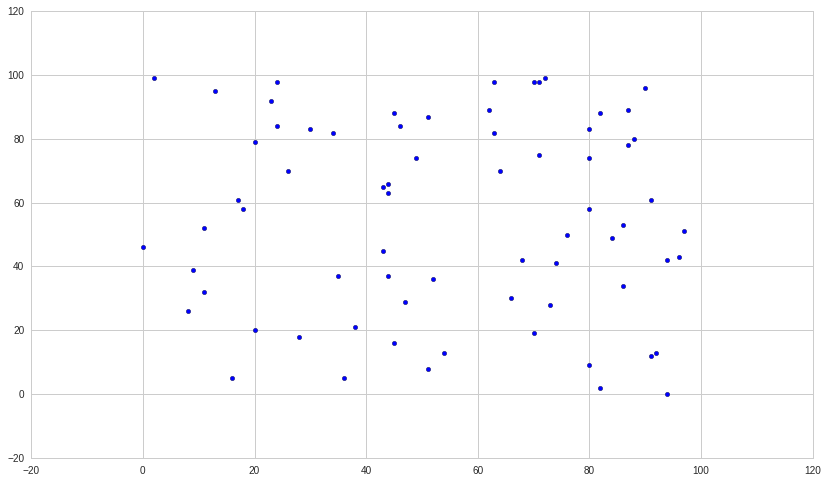

In [3]:
##
# Show example of a generated array
plt.scatter(*zip(*generate_array(70)))
plt.show()

In [4]:
## This is the an implementation where we keep a heap-stack array and only loop over `arry` once.
# - we keep N for looping over the array 
# - then keep a max-heap of k-length

def iterate_saver(arry, k):
    k_arry = []
    for x in arry:
        dist = -1.0 * (x[0]**2 + x[1]**2) # -1 * for max-heap
        if(len(k_arry) < k):
            hq.heappush(k_arry, dist)
        else:
            if(dist > k_arry[0]):
                hq.heapreplace(k_arry, dist)
    return (-1 * np.array(k_arry)) ** (0.5) # -1 * to min-heap

In [5]:
## This is using the tools... pandas
# just do what 'comes to mind'
# - with pandas do the math
# - sort
# - take 0-k

def pandas_df(arry, k, sort_kind='quicksort'):
    frame = pd.DataFrame(arry)
    return np.sort(((frame[0] ** 2 + frame[1] ** 2)), kind=sort_kind)[0:k] ** (0.5)

In [6]:
## Test
# - confirming they are both returning the same thing on a smaller sample

arry = generate_array(100)
k = 3

print('Iterate Saver')
print(iterate_saver(arry, k))
print('Pandas')
print(pandas_df(arry, k))
print("Note that iterate-saver is not ordered, which was not technically a requirement if we just wanted smallest k")

Iterate Saver
[ 11.18033989   6.           8.06225775]
Pandas
[  6.           8.06225775  11.18033989]
Note that iterate-saver is not ordered, which was not technically a requirement if we just wanted smallest k


In [7]:
## Setup of Timing

# don't have %%timeit in this env.. so using poor-mans
import time
 
loops = 10 # 10x for sanity
N = 10000000 # 10 Million points
k = 5
data_saver = {}

In [9]:
##
# Test of iterate_saver which is 'algorithmically' preferred
start = time.time()

for x in range(loops):
    iterate_saver(generate_array(N), k)

data_saver['iterate_saver'] = time.time() - start
print(data_saver['iterate_saver'])

78.967302084


In [10]:
##
# Test of pandas_df which is 'read-ability/tool' preferred
start = time.time()

for x in range(loops):
    pandas_df(generate_array(N), k, sort_kind='quicksort')

data_saver['pd_quicksort'] = time.time() - start
print(data_saver['pd_quicksort'])

10.7560799122


In [11]:
##
# Test of pandas_df which is 'read-ability/tool' preferred, with default sort modified to be heapsort
start = time.time()

for x in range(loops):
    pandas_df(generate_array(N), k, sort_kind='heapsort')

data_saver['pd_heapsort'] = time.time() - start
print(data_saver['pd_heapsort'])

23.4478480816


In [12]:
print("Outcomes")
print(pd.DataFrame.from_dict(data_saver, orient="index"))

Outcomes
                       0
pd_quicksort   10.756080
pd_heapsort    23.447848
iterate_saver  78.967302


### Conclusion

> Pretty cut and dry. Not only is pandas 8x faster (!), it is significantly cleaner, it easier to read and took me significantly less time to write than the heap-sort native implementation. I will note it is important to have some understanding of the choices being made here. IE, while quicksort is a great default for the pandas implementation there are orderings of `generate_array` that would be faster with mergesort. At the same time, that requires an understanding of the state of the given array which would require inspection or assumption. 

> Thanks for reading! 